In [1]:
%load_ext rpy2.ipython

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from pyteomics import mztab
import os

In [3]:
%%R
data_folder = '../datasets/PXD014415'
setwd(data_folder)

In [ ]:
file_name = './UniprotSwiss/out_msstats.csv.gz'
f_name = file_name.replace(".gz", "")
g_file = gzip.GzipFile(file_name)
open(f_name, "wb+").write(g_file.read())
g_file.close()

### MBR

In [4]:
quantms = pd.read_csv("./MBR/out_msstats.csv", sep=',', header=0)
quantms = quantms[-(quantms['ProteinName'].str.contains("DECOY_"))]
print(len(set(quantms['ProteinName'])))
quantms.head()

5564


,ProteinName,PeptideSequence,PrecursorCharge,FragmentIon,ProductCharge,IsotopeLabelType,Condition,BioReplicate,Run,Intensity,Reference
0,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,Control,1,1,70152980.0,a11849_human_90min_hrMS2.mzML
1,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,Control,1,10,68018300.0,a11858_human_90min_hrMS2.mzML
2,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,Control,1,11,71465180.0,a11859_human_90min_hrMS2.mzML
3,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,Control,1,12,68788720.0,a11860_human_90min_hrMS2.mzML
4,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,Control,1,13,76549950.0,a11861_human_90min_hrMS2.mzML


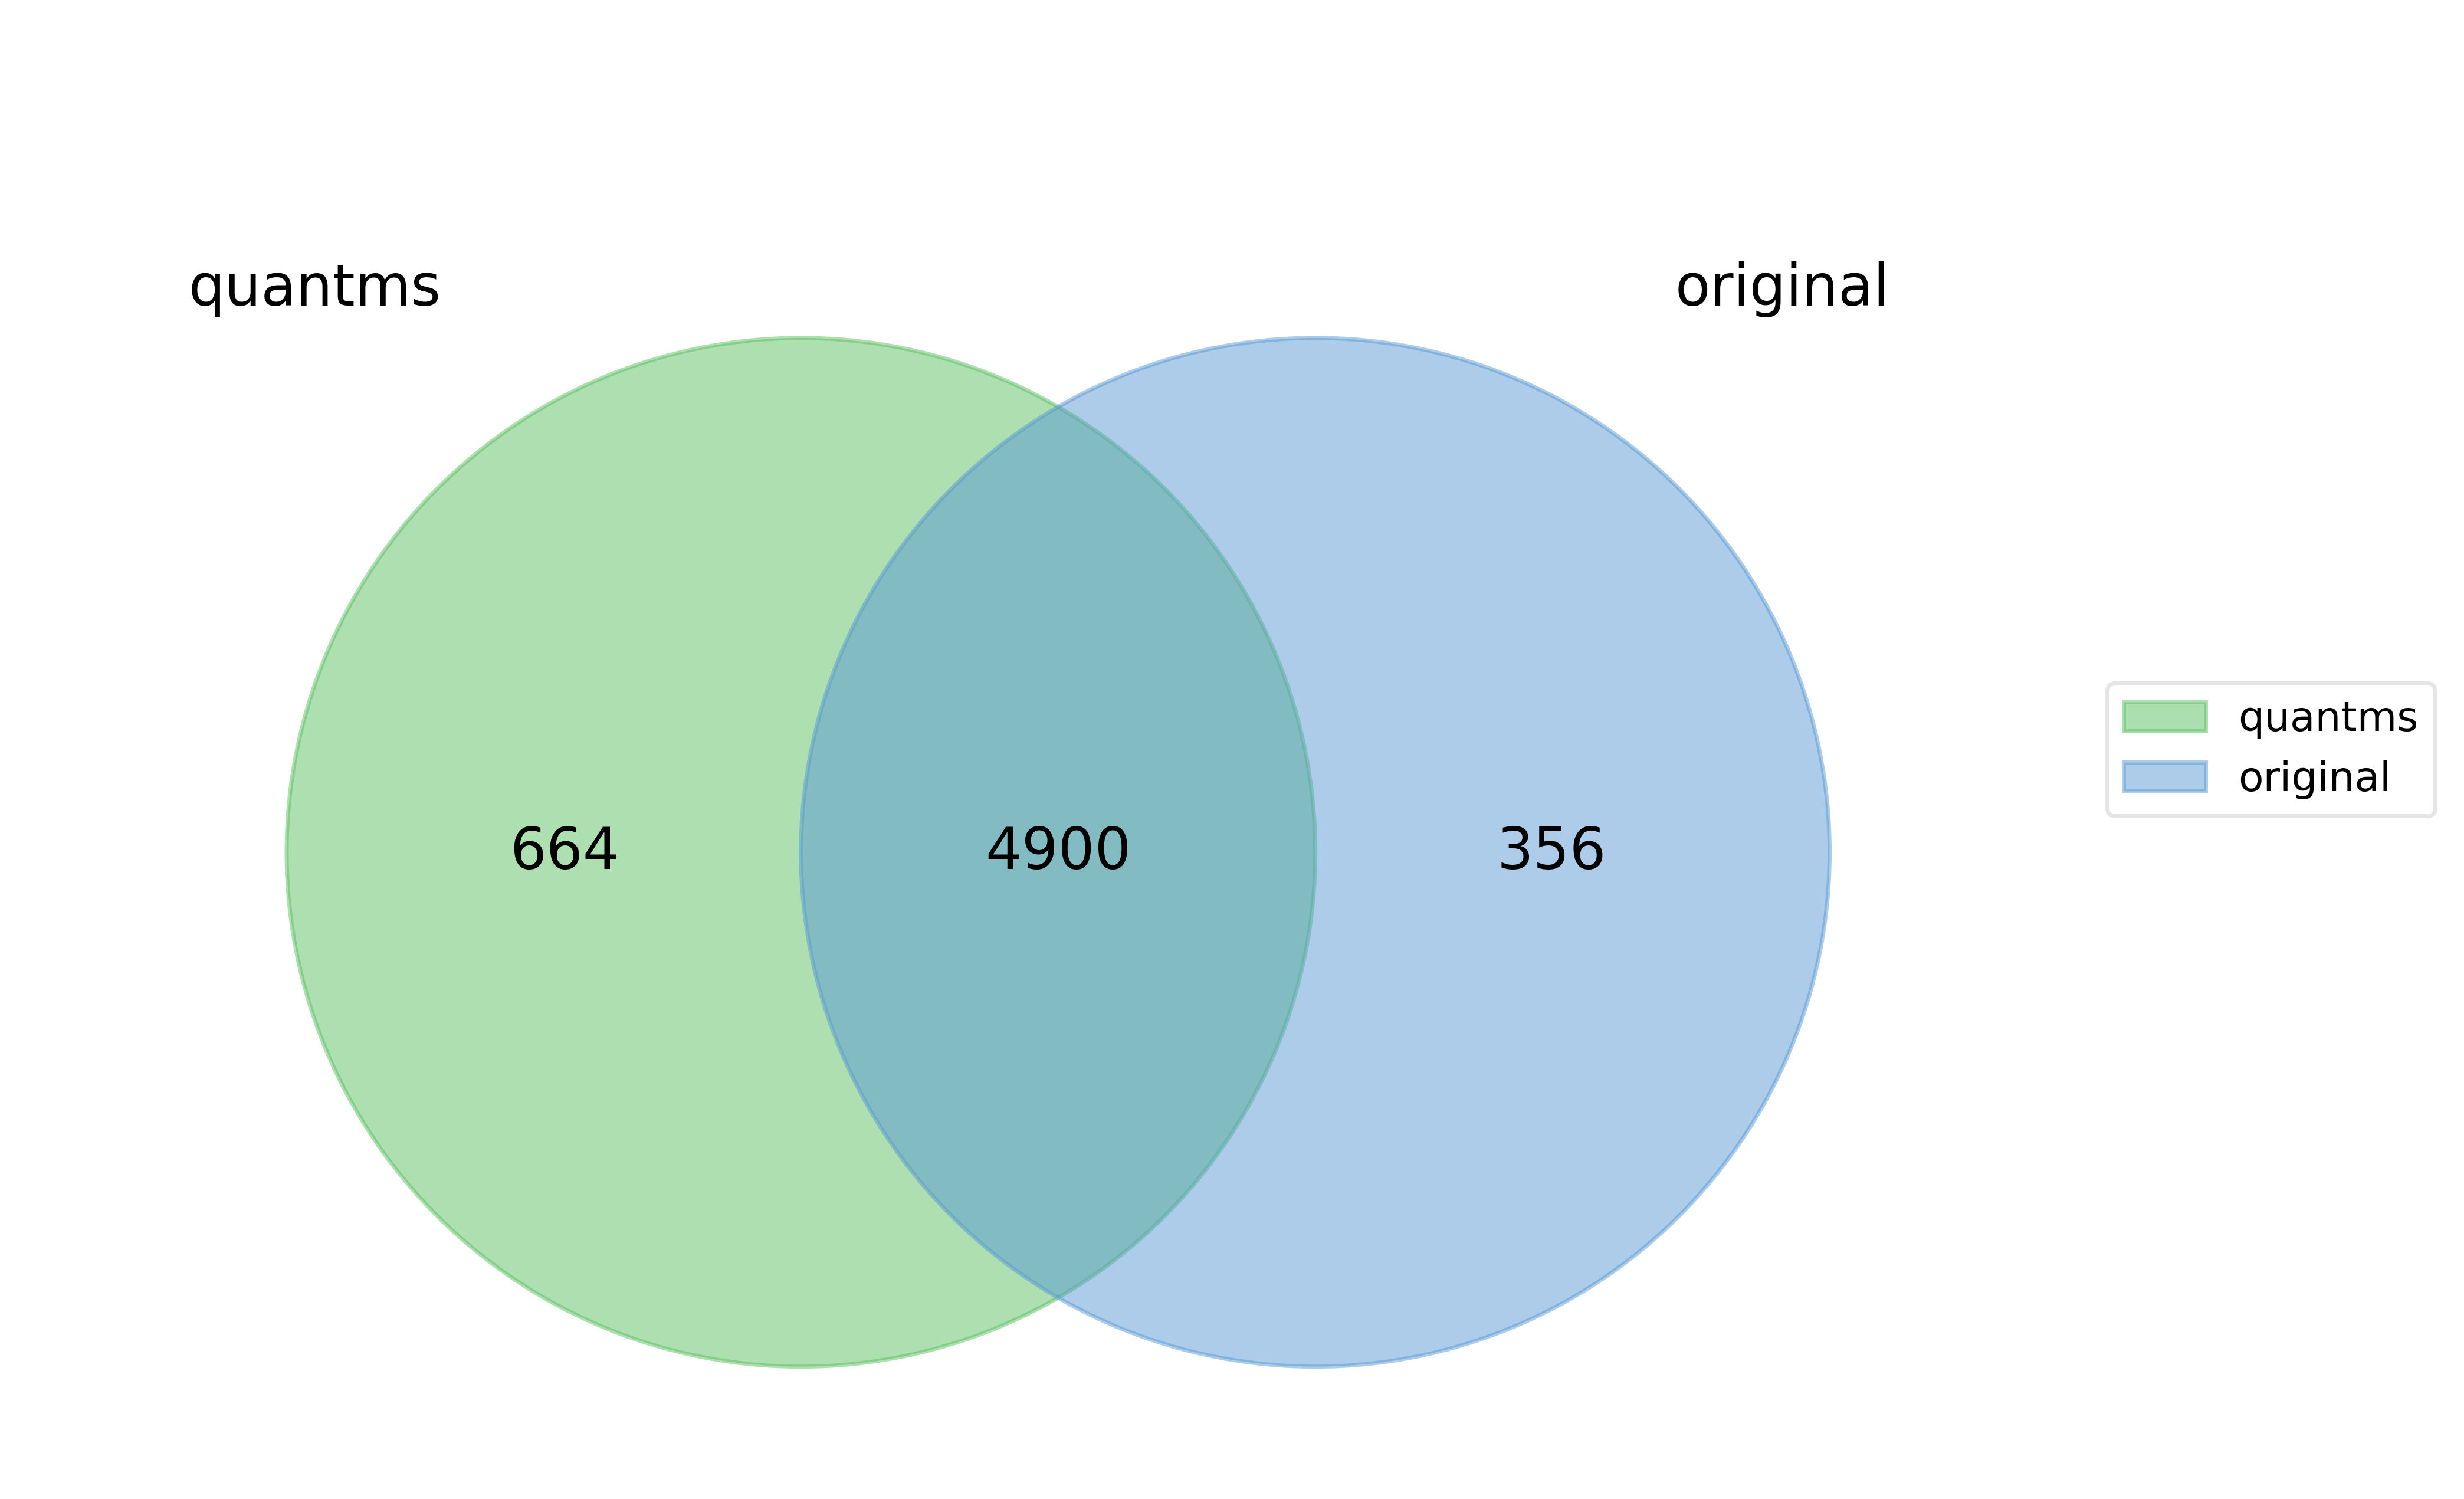

In [5]:
from pyvenn import venn
original = pd.read_excel("mmc2.xlsx", sheet_name="1", header=0)
labels = venn.get_labels([set(quantms['ProteinName']), set(original['Protein'])], fill=['number'])
fig, ax = venn.venn2(labels, names=['quantms', 'original'], dpi=500)
plt.show()                                                                           

In [7]:
data_mztab = mztab.MzTab("./MBR/out.mzTab")
quantms_pep = data_mztab.spectrum_match_table
meta_data = data_mztab.metadata

quantms_pep = quantms_pep[quantms_pep['opt_global_cv_MS:1002217_decoy_peptide'] != 1]
quantms_pep['stand_spectra_ref'] = quantms_pep.apply(
    lambda x: os.path.basename(meta_data[x.spectra_ref.split(':')[0] + '-location']), axis=1)

unique_pep = quantms_pep[quantms_pep['unique'] == 1]
MBR_unique_pep_human = unique_pep[unique_pep['accession'].str.contains("HUMAN")]
print(len(set(MBR_unique_pep_human['sequence'])))

MBR_unique_pep_yeast = unique_pep[unique_pep['accession'].str.contains("YEAST")]
print(len(set(MBR_unique_pep_yeast['sequence'])))

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


44113
4261


In [10]:
MBR_unique_pep_human.to_csv("MBR_unique_pep_human.csv", sep=",", index=False)
MBR_unique_pep_yeast.to_csv("MBR_unique_pep_yeast.csv", sep=",", index=False)

In [9]:
H_human = MBR_unique_pep_human[-MBR_unique_pep_human['stand_spectra_ref'].str.contains("yaeast")]
t_human = []
for name,group in H_human.groupby("stand_spectra_ref"):
    t_human.append(len(set(group["sequence"])))
print(str((max(t_human) + min(t_human)) / 2) + "+-" + str((max(t_human) - min(t_human)) / 2))

H_yeast = MBR_unique_pep_yeast[-MBR_unique_pep_yeast['stand_spectra_ref'].str.contains("yaeast")]
t_human = []
for name,group in H_yeast.groupby("stand_spectra_ref"):
    t_human.append(len(set(group["sequence"])))
print(str((max(t_human) + min(t_human)) / 2) + "+-" + str((max(t_human) - min(t_human)) / 2))


HY_yeast = MBR_unique_pep_yeast[MBR_unique_pep_yeast['stand_spectra_ref'].str.contains("yaeast")]
t_yeast = []
for name,group in HY_yeast.groupby("stand_spectra_ref"):
    t_yeast.append(len(set(group["sequence"])))
print(str((max(t_yeast) + min(t_yeast)) / 2) + "+-" + str((max(t_yeast) - min(t_yeast)) / 2))

HY_human = MBR_unique_pep_human[MBR_unique_pep_human['stand_spectra_ref'].str.contains("yaeast")]
t_yeast = []
for name,group in HY_human.groupby("stand_spectra_ref"):
    t_yeast.append(len(set(group["sequence"])))
print(str((max(t_yeast) + min(t_yeast)) / 2) + "+-" + str((max(t_yeast) - min(t_yeast)) / 2))

28118.5+-603.5
878.5+-8.5
2345.0+-88.0
27642.5+-353.5


### No MBR

In [12]:
quantms_NoMBR = pd.read_csv("./NoMBR/out_msstats.csv", sep=',', header=0)
quantms_NoMBR = quantms_NoMBR[-(quantms_NoMBR['ProteinName'].str.contains("DECOY_"))]
print(len(set(quantms_NoMBR['ProteinName'])))
quantms_NoMBR.head()

5564


,ProteinName,PeptideSequence,PrecursorCharge,FragmentIon,ProductCharge,IsotopeLabelType,Condition,BioReplicate,Run,Intensity,Reference
0,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,Control,1,1,69428780.0,a11849_human_90min_hrMS2.mzML
1,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,Control,1,10,67826070.0,a11858_human_90min_hrMS2.mzML
2,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,Control,1,11,71184290.0,a11859_human_90min_hrMS2.mzML
3,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,Control,1,12,68596060.0,a11860_human_90min_hrMS2.mzML
4,sp|Q86U42|PABP2_HUMAN,.(Acetyl)AAAAAAAAAAGAAGGR,2,NaN,0,L,Control,1,13,76551580.0,a11861_human_90min_hrMS2.mzML


In [13]:
data_mztab = mztab.MzTab("./NoMBR/out.mzTab")
quantms_NoMBR_pep = data_mztab.peptide_table
meta_data = data_mztab.metadata
quantms_NoMBR_pep = quantms_NoMBR_pep[quantms_NoMBR_pep['opt_global_cv_MS:1002217_decoy_peptide'] != 1]
quantms_NoMBR_pep['stand_spectra_ref'] = quantms_NoMBR_pep.apply(
    lambda x: os.path.basename(meta_data[x.spectra_ref.split(':')[0] + '-location']), axis=1)

quantms_NoMBR_unique_pep = quantms_NoMBR_pep[quantms_NoMBR_pep['unique'] == 1]
NoMBR_unique_pep_human = quantms_NoMBR_unique_pep[quantms_NoMBR_unique_pep['accession'].str.contains("HUMAN")]
print(len(set(NoMBR_unique_pep_human['sequence'])))

NoMBR_unique_pep_yeast = quantms_NoMBR_unique_pep[quantms_NoMBR_unique_pep['accession'].str.contains("YEAST")]
print(len(set(NoMBR_unique_pep_yeast['sequence'])))

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


43574
4180


In [14]:
print(len(set(MBR_unique_pep_human['sequence']).union(set(NoMBR_unique_pep_human['sequence']))))
print(len(set(MBR_unique_pep_yeast['sequence']).union(set(NoMBR_unique_pep_yeast['sequence']))))
NoMBR_unique_pep_human.to_csv("NoMBR_unique_pep_human.csv", sep=",", index=False)
NoMBR_unique_pep_yeast.to_csv("NoMBR_unique_pep_yeast.csv", sep=",", index=False)

44113
4261


In [15]:
H_human = NoMBR_unique_pep_human[-NoMBR_unique_pep_human['stand_spectra_ref'].str.contains("yaeast")]
t_human = []
for name,group in H_human.groupby("stand_spectra_ref"):
    t_human.append(len(set(group["sequence"])))
print(str((max(t_human) + min(t_human)) / 2) + "+-" + str((max(t_human) - min(t_human)) / 2))



H_yeast = NoMBR_unique_pep_yeast[-NoMBR_unique_pep_yeast['stand_spectra_ref'].str.contains("yaeast")]
t_human = []
for name,group in H_yeast.groupby("stand_spectra_ref"):
    t_human.append(len(set(group["sequence"])))
print(str((max(t_human) + min(t_human)) / 2) + "+-" + str((max(t_human) - min(t_human)) / 2))


HY_yeast = NoMBR_unique_pep_yeast[NoMBR_unique_pep_yeast['stand_spectra_ref'].str.contains("yaeast")]
t_yeast = []
for name,group in HY_yeast.groupby("stand_spectra_ref"):
    t_yeast.append(len(set(group["sequence"])))
print(str((max(t_yeast) + min(t_yeast)) / 2) + "+-" + str((max(t_yeast) - min(t_yeast)) / 2))

HY_human = NoMBR_unique_pep_human[NoMBR_unique_pep_human['stand_spectra_ref'].str.contains("yaeast")]
t_yeast = []
for name,group in HY_human.groupby("stand_spectra_ref"):
    t_yeast.append(len(set(group["sequence"])))
print(str((max(t_yeast) + min(t_yeast)) / 2) + "+-" + str((max(t_yeast) - min(t_yeast)) / 2))

1406.5+-868.5
5.5+-3.5
252.5+-116.5
1410.0+-771.0


In [16]:
print(len(set(H_human['sequence'])))
print(len(set(H_yeast['sequence'])))
print(len(set(HY_yeast['sequence'])))
print(len(set(HY_human['sequence'])))

24783
95
4092
22035
